In [ ]:
import pandas as pd
import matplotlib as mt
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns

In [ ]:
df = pd.DataFrame(pd.read_excel(r'/content/DA_data_cleaned.xlsx'))

In [ ]:
df = df.drop('Unnamed: 0',axis=1) 

In [ ]:
#Little cleaning, removing "Lab/Chemical Analyst" and "Advertiser" because it's not related with Data Analyst

df = df[~df['Title'].str.contains(r'lab|laboratorium|advertiser|chemical',regex=True,case=False)]

In [ ]:
df

,Title,Company,Location,Salary,Uploaded Time,Job Level,Qualification,Experience Years Needed,Job Type,Company Specialization,Company Scale,Processed Time,Benefit,Description,Link,Date Uploaded,Time
0,DATA ANALYST,PT ADS KOMUNIKASI INDONESIA,Jakarta Pusat,-1,2021-05-25T02:55:30.000Z,Pegawai (non-manajemen & non-supervisor),"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",1 tahun,Kontrak,"Sains, Aktuaria/Statistik",51 - 200 pekerja,19 hari,"Parkir, Kasual (contoh: Kaos), BPJS Ketenagake...",REQUIREMENT\nMin 1 year working experience in ...,https://www.jobstreet.co.id/id/job/data-analys...,2021-05-25,02:55:30
1,Data Analyst & Business Reporting Junior Analyst,"PT Bank Sinarmas, Tbk",Jakarta Raya,-1,2021-05-24T12:37:52.000Z,Pegawai (non-manajemen & non-supervisor),Sarjana (S1),2 tahun,Penuh Waktu,"Akuntansi / Keuangan, Perbankan / Jasa Finansial",Lebih dari 5000 pekerja,29 hari,"Asuransi Gigi, Asuransi kesehatan, Penglihatan...",Kualifikasi :\nMinimal Pendidikan S1 Jurusan I...,https://www.jobstreet.co.id/id/job/data-analys...,2021-05-24,12:37:52
2,Data Analyst,PT Rsystems Ibizcs International,Jakarta Selatan,IDR 8 jt - 10 jt per bulan,2021-05-24T02:26:37.000Z,Pegawai (non-manajemen & non-supervisor),Sarjana (S1),3 tahun,Penuh Waktu,"Penjualan / Pemasaran, Digital Marketing",1- 50 pekerja,None,None,Main Job Description:\n1. Manage project devel...,https://www.jobstreet.co.id/id/job/data-analys...,2021-05-24,02:26:37
3,Marketing Data Analyst,PT Ultra Prima Abadi (Orang Tua Group),Jakarta Barat,-1,2021-05-24T08:56:04.000Z,Pegawai (non-manajemen & non-supervisor),Sarjana (S1),1 tahun,Penuh Waktu,"Komputer/Teknologi Informasi, IT-Admin Jaringa...",Lebih dari 5000 pekerja,16 hari,"Asuransi Gigi, Tunjangan Pendidikan, Tip, Asur...","Collecting, interpreting marketing data, and a...",https://www.jobstreet.co.id/id/job/marketing-d...,2021-05-24,08:56:04
4,DATA ANALYST,PT Hafele Indotama,Tangerang,-1,2021-05-24T03:34:50.000Z,Pegawai (non-manajemen & non-supervisor),Sarjana (S1),1 tahun,Penuh Waktu,"Komputer/Teknologi Informasi, IT-Perangkat Lunak",51 - 200 pekerja,24 hari,"Tip, Asuransi kesehatan, Pinjaman, Waktu regul...",Process Management\nResearch current processes...,https://www.jobstreet.co.id/id/job/data-analys...,2021-05-24,03:34:50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,Financial and Management Report Analyst,PT Serasi Autoraya (Member of Astra),Jakarta Raya,-1,2021-05-04T05:12:12.000Z,Pegawai (non-manajemen & non-supervisor),"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",1 tahun,Penuh Waktu,"Akuntansi / Keuangan, Akuntansi Umum / Pembiayaan",2001 - 5000 pekerja,4 hari,"Asuransi Gigi, Tunjangan Pendidikan, Tip, Asur...",Analyze the comparison of the company's financ...,https://www.jobstreet.co.id/id/job/financial-a...,2021-05-04,05:12:12
506,Data Analyst (Compliance),PT Star Cosmos,Jakarta Barat,-1,2021-04-26T11:19:10.000Z,Pegawai (non-manajemen & non-supervisor),Sarjana (S1),1 tahun,Penuh Waktu,"Lainnya, Lainnya/Kategori tidak tersedia",2001 - 5000 pekerja,28 hari,"Tip, Parkir, Bisnis (contoh: Kemeja), mondays ...",Kandidat harus memiliki setidaknya Gelar Sarja...,https://www.jobstreet.co.id/id/job/data-analys...,2021-04-26,11:19:10
507,Regional Analyst Staff,PT Sicepat Express,Jakarta Pusat,-1,2021-05-10T07:34:28.000Z,Pegawai (non-manajemen & non-supervisor),Sarjana (S1),1 tahun,Penuh Waktu,"Pelayanan, Logistik/Rantai Pasokan",Lebih dari 5000 pekerja,23 hari,"Asuransi kesehatan, Waktu regular, Senin - Jum...",Deskripsi Pekerjaan:\nAnalisa terhadap kebutuh...,https://www.jobstreet.co.id/id/job/regional-an...,2021-05-10,07:34:28
509,Programmer React Native,PT. Digital Animasi Asia,Banten,IDR 7 jt - 9 jt per bulan,2021-05-17T09:48:42.000Z,Pegawai (non-manajemen & non-supervisor),Tidak terspesifikasi,1 tahun,Penuh Waktu,"Pendidikan/Pelatihan, Pendidikan",51 - 200 pekerja,10 hari,"Asuransi kesehatan, Parkir, Penglihatan, Waktu...",Requirement:\nMinimum 1 tahun pengalaman kerja...,https://w

In [ ]:
# Let's group the job title into specific type of job related to data (Data Analyst, Data Scientist, etc)

job_data = []

for job in df.Title:
    if 'analyst' in job.lower():
        job_data.append('Data Analyst')
    elif 'scien' in job.lower():
        job_data.append('Data Scientist')
    elif 'develop' in job.lower():
        job_data.append('Developer')
    elif 'engineer' in job.lower():
        job_data.append('Data Engineer')
    elif 'IT' in job:
        job_data.append('IT Specialist')
    elif 'program' in job.lower():
        job_data.append('Programmer')
    else:
        job_data.append('Others')

In [ ]:
# Show the unique categories and the occurence number
np.unique(job_data, return_counts=True)

(array(['Data Analyst', 'Data Engineer', 'Data Scientist', 'Developer',
        'IT Specialist', 'Others', 'Programmer'], dtype='<U14'),
 array([204,  53,  10,  62,  61,  84,  30]))

In [ ]:
df['Data Job Type']=job_data

In [ ]:
df

,Title,Company,Location,Salary,Uploaded Time,Job Level,Qualification,Experience Years Needed,Job Type,Company Specialization,Company Scale,Processed Time,Benefit,Description,Link,Date Uploaded,Time,Data Job Type
0,DATA ANALYST,PT ADS KOMUNIKASI INDONESIA,Jakarta Pusat,-1,2021-05-25T02:55:30.000Z,Pegawai (non-manajemen & non-supervisor),"SMA, SMU/SMK/STM, Sertifikat Professional, D3 ...",1 tahun,Kontrak,"Sains, Aktuaria/Statistik",51 - 200 pekerja,19 hari,"Parkir, Kasual (contoh: Kaos), BPJS Ketenagake...",REQUIREMENT\nMin 1 year working experience in ...,https://www.jobstreet.co.id/id/job/data-analys...,2021-05-25,02:55:30,Data Analyst
1,Data Analyst & Business Reporting Junior Analyst,"PT Bank Sinarmas, Tbk",Jakarta Raya,-1,2021-05-24T12:37:52.000Z,Pegawai (non-manajemen & non-supervisor),Sarjana (S1),2 tahun,Penuh Waktu,"Akuntansi / Keuangan, Perbankan / Jasa Finansial",Lebih dari 5000 pekerja,29 hari,"Asuransi Gigi, Asuransi kesehatan, Penglihatan...",Kualifikasi :\nMinimal Pendidikan S1 Jurusan I...,https://www.jobstreet.co.id/id/job/data-analys...,2021-05-24,12:37:52,Data Analyst
2,Data Analyst,PT Rsystems Ibizcs International,Jakarta Selatan,IDR 8 jt - 10 jt per bulan,2021-05-24T02:26:37.000Z,Pegawai (non-manajemen & non-supervisor),Sarjana (S1),3 tahun,Penuh Waktu,"Penjualan / Pemasaran, Digital Marketing",1- 50 pekerja,None,None,Main Job Description:\n1. Manage project devel...,https://www.jobstreet.co.id/id/job/data-analys...,2021-05-24,02:26:37,Data Analyst
3,Marketing Data Analyst,PT Ultra Prima Abadi (Orang Tua Group),Jakarta Barat,-1,2021-05-24T08:56:04.000Z,Pegawai (non-manajemen & non-supervisor),Sarjana (S1),1 tahun,Penuh Waktu,"Komputer/Teknologi Informasi, IT-Admin Jaringa...",Lebih dari 5000 pekerja,16 hari,"Asuransi Gigi, Tunjangan Pendidikan, Tip, Asur...","Collecting, interpreting marketing data, and a...",https://www.jobstreet.co.id/id/job/marketing-d...,2021-05-24,08:56:04,Data Analyst
4,DATA ANALYST,PT Hafele Indotama,Tangerang,-1,2021-05-24T03:34:50.000Z,Pegawai (non-manajemen & non-supervisor),Sarjana (S1),1 tahun,Penuh Waktu,"Komputer/Teknologi Informasi, IT-Perangkat Lunak",51 - 200 pekerja,24 hari,"Tip, Asuransi kesehatan, Pinjaman, Waktu regul...",Process Management\nResearch current processes...,https://www.jobstreet.co.id/id/job/data-analys...,2021-05-24,03:34:50,Data Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505,Financial and Management Report Analyst,PT Serasi Autoraya (Member of Astra),Jakarta Raya,-1,2021-05-04T05:12:12.000Z,Pegawai (non-manajemen & non-supervisor),"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",1 tahun,Penuh Waktu,"Akuntansi / Keuangan, Akuntansi Umum / Pembiayaan",2001 - 5000 pekerja,4 hari,"Asuransi Gigi, Tunjangan Pendidikan, Tip, Asur...",Analyze the comparison of the company's financ...,https://www.jobstreet.co.id/id/job/financial-a...,2021-05-04,05:12:12,Data Analyst
506,Data Analyst (Compliance),PT Star Cosmos,Jakarta Barat,-1,2021-04-26T11:19:10.000Z,Pegawai (non-manajemen & non-supervisor),Sarjana (S1),1 tahun,Penuh Waktu,"Lainnya, Lainnya/Kategori tidak tersedia",2001 - 5000 pekerja,28 hari,"Tip, Parkir, Bisnis (contoh: Kemeja), mondays ...",Kandidat harus memiliki setidaknya Gelar Sarja...,https://www.jobstreet.co.id/id/job/data-analys...,2021-04-26,11:19:10,Data Analyst
507,Regional Analyst Staff,PT Sicepat Express,Jakarta Pusat,-1,2021-05-10T07:34:28.000Z,Pegawai (non-manajemen & non-supervisor),Sarjana (S1),1 tahun,Penuh Waktu,"Pelayanan, Logistik/Rantai Pasokan",Lebih dari 5000 pekerja,23 hari,"Asuransi kesehatan, Waktu regular, Senin - Jum...",Deskripsi Pekerjaan:\nAnalisa terhadap kebutuh...,https://www.jobstreet.co.id/id/job/regional-an...,2021-05-10,07:34:28,Data Analyst
509,Programmer React Native,PT. Digital Animasi Asia,Banten,IDR 7 jt - 9 jt per bulan,2021-05-17T09:48:42.000Z,Pegawai (non-manajemen & non-supervisor),Tidak terspesifikasi,1 tahun,Penuh Waktu,"Pendidikan/Pelatihan, Pendidikan",51 - 200 peker

# Common Keyword for Job related with Data

In [ ]:
# Let's perform "so-called Advance " technique of text pre-processing  
# Tools : nltk, wordcloud, langdetect
!pip install langdetect

from langdetect import detect as dt
from langdetect import detect_langs as dtl #show languages probability 
from wordcloud import WordCloud, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# First, let's define the language of the description (bcs there are descriptions using Bahasa, other are using English)

language=[]
for words in df['Description']:
    if dt(words) == 'id':
        language.append('Indonesia')
    else:
        language.append('English')
        
df['Description Language'] = language

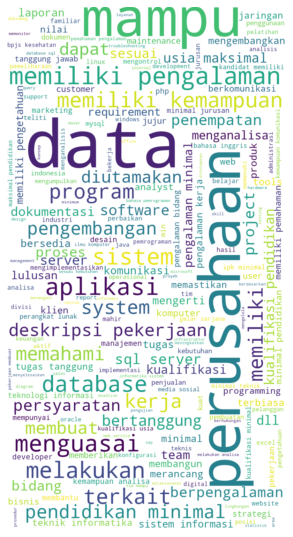

In [ ]:
# Function for removing punctuation and stopwords (Bahasa Indonesia)

def word_mining_id(text):
  filtered=[]
  stop_words = set(stopwords.words('indonesian'))
  word_tokens = word_tokenize(text)
  for w in word_tokens:
    if w not in stop_words and w.isalpha():
      filtered.append(w.lower())
  return filtered

# Let's find the common keyword in the Description using Bahasa Indonesia
id_desc = df[df['Description Language'].str.contains("Indonesia")] # Sorting out dataframe contains Indonesian description

words = " ".join(id_desc['Description']) # select the description column

words_filtered = word_mining_id(words)

text = " ".join([ele for ele in words_filtered]) # create a string by passing in the filtered result (ele)

#create the visualization parameter
wc = WordCloud(background_color="white", random_state=1, max_words= 200, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[5,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

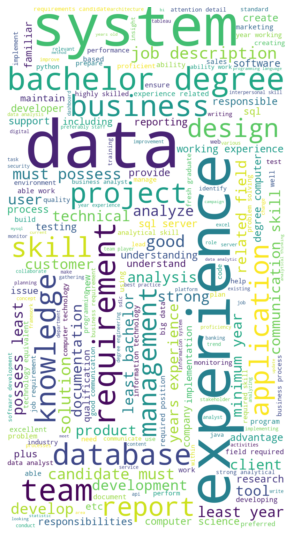

In [ ]:
# Function for removing punctuation and stopwords (Bahasa Indonesia)

def word_mining_en(text):
  filtered=[]
  stop_words = set(stopwords.words('english'))
  word_tokens = word_tokenize(text)
  for w in word_tokens:
    if w not in stop_words and w.isalpha():
      filtered.append(w.lower())
  return filtered

# Let's find the common keyword in the Description using English

id_desc = df[df['Description Language'].str.contains("English")] # Sorting out dataframe contains English description

words = " ".join(id_desc['Description']) # select the description column

words_filtered = word_mining_en(words)

text = " ".join([ele for ele in words_filtered]) # create a string by passing in the filtered result (ele)

#create the visualization parameter
wc = WordCloud(background_color="white", random_state=1, max_words= 200, width=800, height=1500)
wc.generate(text)

plt.figure(figsize=[5,10])
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.show()

# Visualizing location where the job available

In [ ]:
# This step inspired by the work from Bima Putra
# https://towardsdatascience.com/noobs-guide-to-create-choropleth-map-using-python-geopandas-d6269e9e9a0c
# Github bimaputra1/School_Participation_Rates_with_GeoPandas

!pip install geopandas
import geopandas as gpd

# FIrst, we will Import Indonesia province GeoJSON data from GADM (gadm.org)
df_geoindo = gpd.read_file(r'/content/gadm36_IDN_1.json')
df_geoindo

,GID_0,NAME_0,GID_1,NAME_1,VARNAME_1,NL_NAME_1,TYPE_1,ENGTYPE_1,CC_1,HASC_1,geometry
0,IDN,Indonesia,IDN.1_1,Aceh,,,Propinisi,Province,11,ID.AC,"MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1..."
1,IDN,Indonesia,IDN.2_1,Bali,,,Propinisi,Province,51,ID.BA,"MULTIPOLYGON (((115.59464 -8.81672, 115.59444 ..."
2,IDN,Indonesia,IDN.3_1,Bangka Belitung,,,Propinisi,Province,19,ID.BB,"MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ..."
3,IDN,Indonesia,IDN.4_1,Banten,,,Propinisi,Province,36,ID.BT,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ..."
4,IDN,Indonesia,IDN.5_1,Bengkulu,,,Propinisi,Province,17,ID.BE,"MULTIPOLYGON (((102.37586 -5.36968, 102.38067 ..."
5,IDN,Indonesia,IDN.6_1,Gorontalo,,,Propinisi,Province,75,ID.GO,"MULTIPOLYGON (((121.41933 0.41357, 121.41941 0..."
6,IDN,Indonesia,IDN.7_1,Jakarta Raya,,,Propinisi,Province,31,ID.JK,"MULTIPOLYGON (((106.73563 -6.04014, 106.73548 ..."
7,IDN,Indonesia,IDN.8_1,Jambi,,,Propinisi,Province,15,ID.JA,"MULTIPOLYGON (((104.40900 -0.85951, 104.40870 ..."
8,IDN,Indonesia,IDN.9_1,Jawa Barat,,,Propinisi,Province,32,ID.JR,"MULTIPOLYGON (((108.68501 -6.76990, 108.68410 ..."
9,IDN,Indonesia,IDN.10_1,Jawa Tengah,,,Propinisi,Province,33,ID.JT,"MULTIPOLYGON (((108.88353 -7.74846, 108.88322 ..."


In [ ]:
# Because JSON data contains province data, unlike our data that contains the city, we should categorize the city
# into specific province

df.Location.unique()

array(['Jakarta Pusat', 'Jakarta Raya', 'Jakarta Selatan',
       'Jakarta Barat', 'Tangerang', 'Balikpapan', 'Jakarta Utara',
       'Surabaya', 'Riau', 'Kepulauan Riau', 'Bandung', 'Jakarta Timur',
       'Yogyakarta', 'Batam', 'Sidoarjo', 'Bogor', 'Kudus', 'Jawa Timur',
       'Lampung', 'Depok', 'Bekasi', 'Pekanbaru', 'Kalimantan Selatan',
       'Kalimantan Timur', 'Semarang', 'Kupang', 'Salatiga',
       'Manila City, National Capital Reg', 'Palembang', 'Sleman',
       'Medan', 'Denpasar', 'Jember', 'Jawa Barat', 'Badung', 'Banten',
       'Madiun', 'Sumatera Utara', 'Karawang', 'Cianjur'], dtype=object)

In [ ]:
province = []

for city in df.Location:
  if re.match(r'Jakarta', city, flags=re.I):
    province.append('Jakarta Raya')
  elif re.match(r'tangerang|banten', city, flags=re.I):
    province.append('Banten')
  elif re.match(r'bandung|bogor|depok|bekasi|jawa barat|karawang|cianjur', city, flags=re.I):
    province.append('Jawa Barat')
  elif re.match(r'surabaya|sidoarjo|jawa timur|jember|madiun', city, flags=re.I):
    province.append('Jawa Timur')
  elif re.match(r'kudus|semarang|salatiga', city, flags=re.I):
    province.append('Jawa Tengah')
  elif re.match(r'yogyakarta|sleman|bantul', city, flags=re.I):
    province.append('Yogyakarta')
  elif re.match(r'balikpapan|kalimantan timur', city, flags=re.I):
    province.append('Kalimantan Timur')
  elif re.match(r'/<riau/>|pekanbaru', city, flags=re.I):
    province.append('Riau')
  elif re.match(r'kepulauan|batam', city, flags=re.I):
    province.append('Kepulauan Riau')
  elif re.match(r'lampung', city, flags=re.I):
    province.append('Lampung')
  elif re.match(r'kalimantan selatan', city, flags=re.I):
    province.append('Kalimantan Selatan')
  elif re.match(r'kupang', city, flags=re.I):
    province.append('Nusa Tenggara Timur')
  elif re.match(r'palembang', city, flags=re.I):
    province.append('Sumatera Selatan')
  elif re.match(r'medan|sumatera utara', city, flags=re.I):
    province.append('Sumatera Utara')
  elif re.match(r'denpasar|badung', city, flags=re.I):
    province.append('Bali')
  else:
    province.append('Other')

df['Province'] = province
df = df[~df.Province.str.contains('Other')]

In [ ]:
# Re-check the 'Riau' data in Province column
df[df.Province.str.contains('Riau',regex=False)][['Province','Location']]

,Province,Location
59,Kepulauan Riau,Kepulauan Riau
78,Kepulauan Riau,Batam
106,Kepulauan Riau,Batam
150,Riau,Pekanbaru
179,Kepulauan Riau,Batam
222,Riau,Pekanbaru
468,Kepulauan Riau,Batam


In [ ]:
# All good, so now we're ready to process to the next step

# Create new dataframe that only contains Province Column and the number of Job Available in that province
# I use Link column to count the number, because Link is definitely unique for every job

df1 = df.groupby('Province')['Link'].nunique()
df1 = pd.DataFrame(df1).reset_index()
df1 = df1.rename(columns={"Link": "Job Available"}) #rename the column

In [ ]:
# Merging df1 and df_geoindo

# Because we want all the Province data in JSON to be appeared, let's use outer join
df_join = df_geoindo.merge(df1, how='outer', left_on='NAME_1', right_on='Province')
df_join = df_join[['NAME_1','Job Available', 'geometry']]
df_join

,NAME_1,Job Available,geometry
0,Aceh,NaN,"MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1..."
1,Bali,4.0,"MULTIPOLYGON (((115.59464 -8.81672, 115.59444 ..."
2,Bangka Belitung,NaN,"MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ..."
3,Banten,30.0,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ..."
4,Bengkulu,NaN,"MULTIPOLYGON (((102.37586 -5.36968, 102.38067 ..."
5,Gorontalo,NaN,"MULTIPOLYGON (((121.41933 0.41357, 121.41941 0..."
6,Jakarta Raya,365.0,"MULTIPOLYGON (((106.73563 -6.04014, 106.73548 ..."
7,Jambi,NaN,"MULTIPOLYGON (((104.40900 -0.85951, 104.40870 ..."
8,Jawa Barat,35.0,"MULTIPOLYGON (((108.68501 -6.76990, 108.68410 ..."
9,Jawa Tengah,7.0,"MULTIPOLYGON (((108.88353 -7.74846, 108.88322 ..."


In [ ]:
# Change "NaN" into 0

df_join['Job Available'] = df_join['Job Available'].fillna(0)
df_join['Job Available'] = df_join['Job Available'].astype(int)

In [ ]:
# normalize data

maxim = max(df_join['Job Available'])
minim = min(df_join['Job Available'])
norm = []

for num in df_join['Job Available']:
  norm.append((num/(maxim-minim))*100)

In [ ]:
# Create a column filled with normalized Job Available

df_join['Normalized Job Available'] = norm

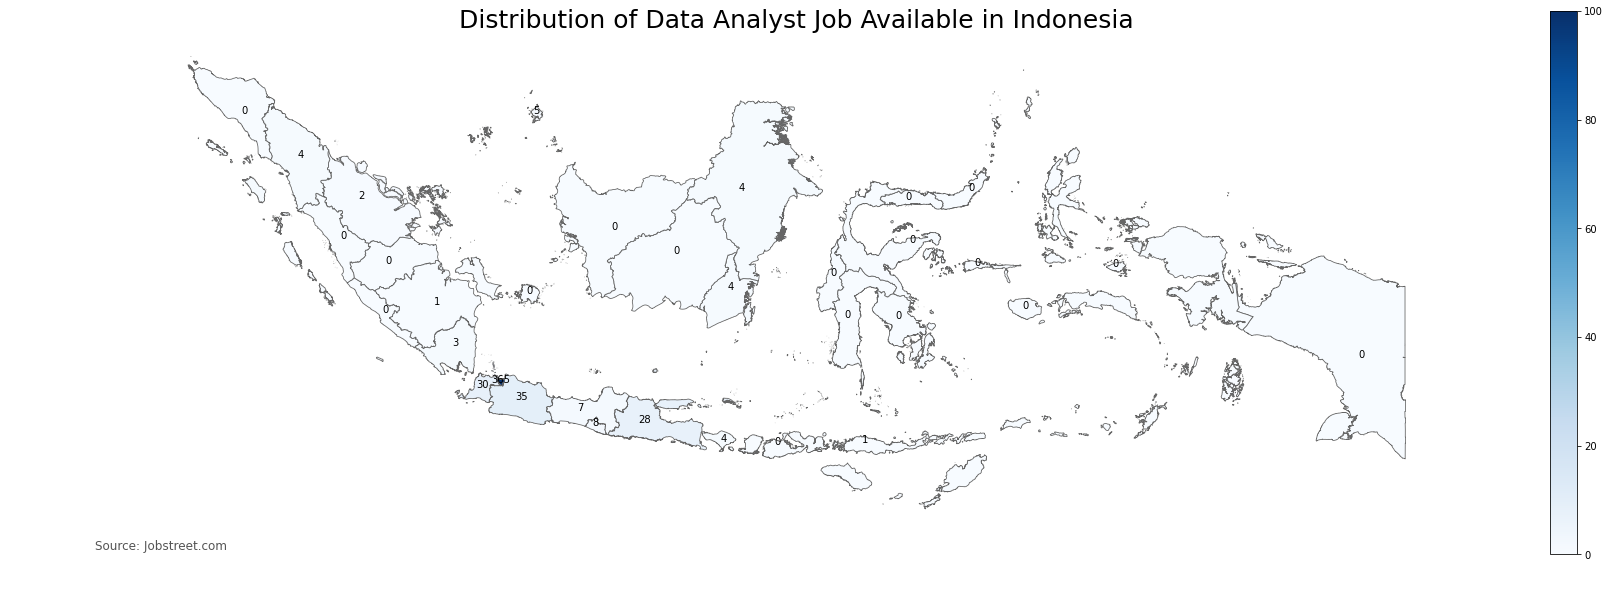

In [ ]:
# Let's create a map to visualize the number of job available in each province

column_job = 'Normalized Job Available'

# Set the range of value for chloropleth

vmin,vmax = 0,100

fig,ax = plt.subplots(1,figsize=(30,10))
ax.axis('off') # removing axis
title = 'Distribution of Data Analyst Job Available in Indonesia'
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'}) #Create title
ax.annotate('Source: Jobstreet.com', xy=(0.1, .08), xycoords='figure fraction',
            horizontalalignment='center', fontsize=12, color='#555555') #create annotation

# Add the value in the map

df_join['Coords'] = df_join['geometry'].apply(lambda x: x.representative_point().coords[:])
df_join['Coords'] = [coords[0] for coords in df_join['Coords']]
for idx, row in df_join.iterrows():
  plt.annotate(s=row['Job Available'], xy = row['Coords'], horizontalalignment='center')

# Create colorbar as legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# add the colorbar to the figure
cbar = fig.colorbar(sm)

# Plot the map

df_join.plot(column=column_job, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.4', norm=plt.Normalize(vmin=vmin, vmax=vmax))


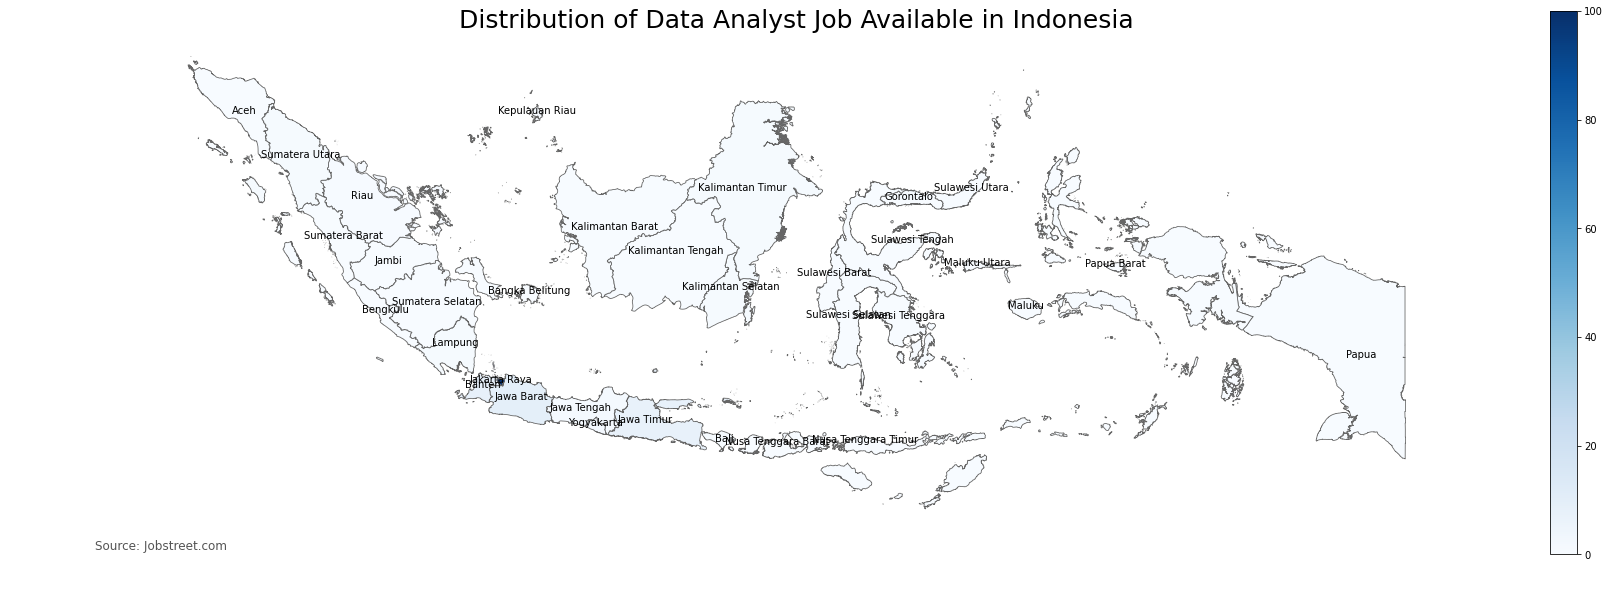

In [ ]:
fig,ax = plt.subplots(1,figsize=(30,10))
ax.axis('off') # removing axis
title = 'Distribution of Data Analyst Job Available in Indonesia'
ax.set_title(title, fontdict={'fontsize': '25', 'fontweight': '3'}) #Create title
ax.annotate('Source: Jobstreet.com', xy=(0.1, .08), xycoords='figure fraction',
            horizontalalignment='center', fontsize=12, color='#555555') #create annotation

# Add the Province in the map

df_join['Coords'] = df_join['geometry'].apply(lambda x: x.representative_point().coords[:])
df_join['Coords'] = [coords[0] for coords in df_join['Coords']]
for idx, row in df_join.iterrows():
  plt.annotate(s=row['NAME_1'], xy = row['Coords'], horizontalalignment='center')

# Create colorbar as legend
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))

# add the colorbar to the figure
cbar = fig.colorbar(sm)

# Plot the map

df_join.plot(column=column_job, cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.4', norm=plt.Normalize(vmin=vmin, vmax=vmax))

<BarContainer object of 33 artists>

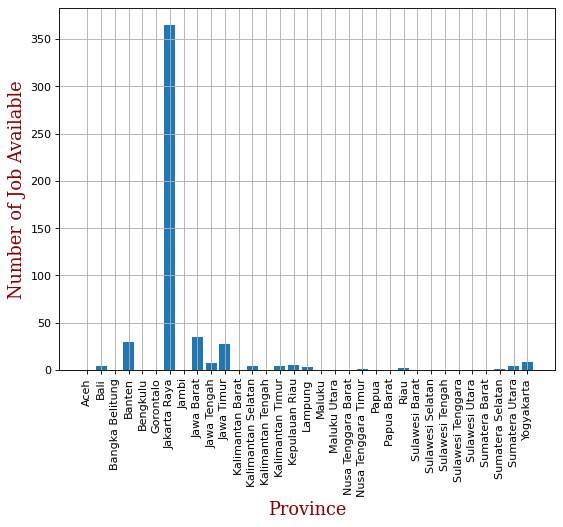

In [ ]:
# Basic Graph for distribution of Data Analyst Job in each Province

x = df_join['NAME_1']
y = df_join['Job Available']

font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 16,
        }

plt.figure(figsize=(8, 6), dpi=80)
plt.xlabel('Province', fontdict=font)
plt.ylabel('Number of Job Available', fontdict=font)
plt.xticks(x.index, rotation='vertical')
plt.grid()
plt.bar(x,y)

# Chance to get a job if you have skill in Python/R, Tableau/Power BI, SQL

In [ ]:
# Chance in all job available

# We'll perform substring search in Description column
# The substrings are Python, R, Tableau, Power BI, SQL 
Python = []
R = []
Tableau = []
Power_BI = []
SQL = []

# Searching for Python
for word1 in df.Description:
  if re.search('python|/<,python/>|/<python,/>|/<,python,/>', word1, flags=re.I):
    Python.append(1)
  else:
    Python.append(0)

# Searching for R
for word2 in df.Description:
  if re.search('/<R/>|/<,R/>|/<R,/>|/<,R,/>', word2, flags=re.I):
    R.append(1)
  else:
    R.append(0)

# Searching for Tableau
for word3 in df.Description:
  if re.search('tableau', word3, flags=re.I):
    Tableau.append(1)
  else:
    Tableau.append(0)

# Searching for Power BI
for word4 in df.Description:
  if re.search('power BI|powerBI', word4, flags=re.I):
    Power_BI.append(1)
  else:
    Power_BI.append(0)

# Searching for SQL
for word5 in df.Description:
  if re.search('sql', word5, flags=re.I):
    SQL.append(1)
  else:
    SQL.append(0)

# np.unique(Python, return_counts=True)

df['Python'] = Python
df['R'] = R
df['SQL'] = SQL
df['Tableau'] = Tableau
df['Power_BI'] = Power_BI 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
# But apparently in this dataset, there's no job vacancy that require R programming as skill, so we'll leave R behind

np.unique(R, return_counts=True) # you can see that there's only 0 as its unique value, that means there's no R required

(array([0]), array([501]))

In [ ]:
df = df.reset_index() # Avoiding missing index beacuse of dropped rows we performed earlier

In [ ]:
# Let's create another columns that pass these conditions below
# Conditions : (Python/SQL/Tableau/Power BI only, Python & SQl only, Tableau & SQL only, etc)

# First we'll find out how many job vacancies that require only one skill
py_only = []
sql_only = []
tab_only = []
bi_only = []
py_sql = []
py_tab = []
py_bi = []
sql_tab = []
sql_bi = []
py_sql_bi = []
py_sql_tab = []

# Idea : we have int 0 and 1 to determine whether there's this certain skill or not in the job desc
# So, we'll perform simple mathematic operation, which is subtraction
# If we sustract python row with another rows, it will tell us that certain job require python only if it return 1 as its result
# Ex. row 45 contain 1 for python, 0 for sql and 1 for tableau. If we subtract python with another 2 rows, it will 
## return 0 as a result (1-0-1 = 0). Then row 45 is not eligible for Python Only

# Python Only
for i in range (0,len(df)):
  if df.Python[i]-(df.SQL[i]+df.Tableau[i]+df.Power_BI[i]) == 1:
    py_only.append(1)
  else:
    py_only.append(0)

# SQL Only
for i in range (0,len(df)):
  if df.SQL[i]-(df.Python[i]+df.Tableau[i]+df.Power_BI[i]) == 1:
    sql_only.append(1)
  else:
    sql_only.append(0)

# Tableau only
for i in range (0,len(df)):
  if df.Tableau[i]-(df.Python[i]+df.SQL[i]+df.Power_BI[i]) == 1:
    tab_only.append(1)
  else:
    tab_only.append(0)

# Power BI only
for i in range (0,len(df)):
  if df.Power_BI[i]-(df.Python[i]+df.SQL[i]+df.Tableau[i]) == 1:
    bi_only.append(1)
  else:
    bi_only.append(0)

# Python and SQL only
for i in range (0,len(df)):
  if df.Python[i]+df.SQL[i]-(df.Power_BI[i]+df.Tableau[i]) == 2:
    py_sql.append(1)
  else:
    py_sql.append(0)

# Python and Tableau only
for i in range (0,len(df)):
  if df.Python[i]+df.Tableau[i]-(df.Power_BI[i]+df.SQL[i]) == 2:
    py_tab.append(1)
  else:
    py_tab.append(0)

# Python and Power BI only
for i in range (0,len(df)):
  if df.Python[i]+df.Power_BI[i]-(df.Tableau[i]+df.SQL[i]) == 2:
    py_bi.append(1)
  else:
    py_bi.append(0)

# SQL and Tableau only
for i in range (0,len(df)):
  if df.SQL[i]+df.Tableau[i]-(df.Power_BI[i]+df.Python[i]) == 2:
    sql_tab.append(1)
  else:
    sql_tab.append(0)

# SQL and Power BI only
for i in range (0,len(df)):
  if df.SQL[i]+df.Power_BI[i]-(df.Python[i]+df.Tableau[i]) == 2:
    sql_bi.append(1)
  else:
    sql_bi.append(0)

# Python, SQL and Power BI
for i in range (0,len(df)):
  if (df.Python[i]+df.Power_BI[i]+df.SQL[i])-df.Tableau[i] == 3:
    py_sql_bi.append(1)
  else:
    py_sql_bi.append(0)

# Python, SQL and Tableau
for i in range (0,len(df)):
  if (df.Python[i]+df.Tableau[i]+df.SQL[i])-df.Power_BI[i] == 3:
    py_sql_tab.append(1)
  else:
    py_sql_tab.append(0)

# np.unique(bi_only, return_counts=True)

df['Python Only'] = py_only
df['SQL Only'] = sql_only
df['Tableau Only'] = tab_only
df['Power BI Only'] = bi_only
df['Python SQL Only']= py_sql
df['Python Tableau Only'] = py_tab
df['Python Power BI Only'] = py_bi
df['SQL Tableau Only'] = sql_tab
df['SQL Power BI Only'] = sql_bi
df['Python SQL Tableau'] = py_sql_tab
df['Python SQL Power BI'] = py_sql_bi


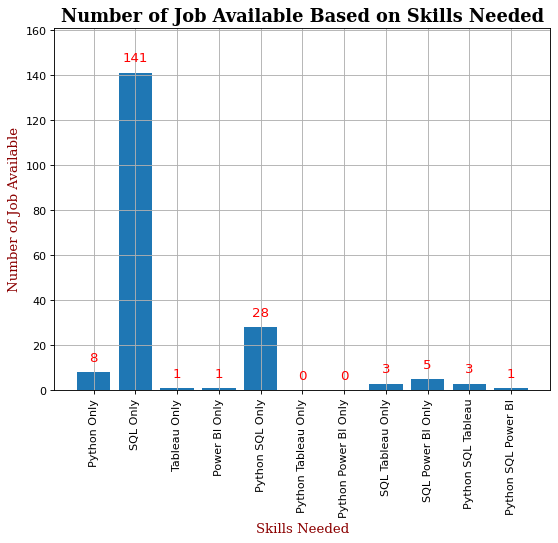

In [ ]:
# Visualizing the Result based on skill needed

df_skill = df[['Python Only','SQL Only','Tableau Only', 'Power BI Only',
    'Python SQL Only','Python Tableau Only','Python Power BI Only','SQL Tableau Only',
    'SQL Power BI Only','Python SQL Tableau','Python SQL Power BI']]

x = df_skill.columns
y = df_skill.sum()
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }

font1 = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(x,y)
plt.xticks(x, rotation='vertical')
plt.xlabel('Skills Needed', fontdict=font)
plt.ylim(0,max(y)+20)
plt.ylabel('Number of Job Available', fontdict=font)
plt.title('Number of Job Available Based on Skills Needed', fontdict=font1)
plt.grid()
# put number in top of bar
for i, v in enumerate(y): # i is the iteration number, v is the content of y itself
    # plt.text(xticks = i, yticks = v+5(+5 will give a space between number and bar, the rest is font styling))
    plt.text(i , v + 5, str(v), color='red', fontweight='normal', fontdict={'size' : 12, 'family': 'sans-serif'}, horizontalalignment = 'center')
plt.show()

# Salary VS Company Scale, City, etc

In [ ]:
# First, we need to get rid table that don't have salary (-1), and salary with SGD currency

df_salary = df[~df['Salary'].str.contains(r'-1|SGD')].reset_index()

# Next, we'll only extract the numeric content and place it in new column

# Get rid of "IDR", " per bulan", " jt" and whitespace (" ") by replacing them with empty string ("")
df_salary['Salary'] = df_salary['Salary'].apply(lambda x: x.replace('IDR ','').replace(' per bulan','').replace(' jt','').replace(' ',''))

# Get the first number as Min Salary Range, and second as Max Salary Range (They're divided by "-" symbol by the way, so split them will do the trick)
df_salary['Min Salary Range'] = df_salary['Salary'].apply(lambda x: x.split('-')[0].replace(',','.'))
df_salary['Max Salary Range'] = df_salary['Salary'].apply(lambda x: x.split('-')[1].replace(',','.'))

# Change dtype from string into float (we use float instead of int because there are some Salary with decimal)
df_salary[['Min Salary Range','Max Salary Range']] = df_salary[['Min Salary Range','Max Salary Range']].astype(float)

In [ ]:
# Let's see the basic stats of our Min Salary and Max Salary
df_salary[['Min Salary Range','Max Salary Range']].describe()

,Min Salary Range,Max Salary Range
count,129.000000,129.000000
mean,5.817054,8.488372
std,2.277544,4.074418
min,2.000000,2.500000
25%,4.300000,5.500000
50%,5.000000,7.000000
75%,7.000000,10.000000
max,17.000000,24.000000


## Salary vs Year of Experience (Entry-level)

#### All job available

In [ ]:
df_salary['Experience Years Needed'].unique()

array(['3 tahun', 'None', '1 tahun', '2 tahun', '5 tahun', '4 tahun'],
      dtype=object)

In [ ]:
# Let's find out whether "none" in years experience is always equal to 0 years (fresh-graduate) or not
# We will compare it with Job Level

# df_salary.head(5)
df_salary[df_salary['Experience Years Needed'].str.contains('None')]['Job Level']

2      Lulusan baru/Pengalaman kerja kurang dari 1 tahun
4      Lulusan baru/Pengalaman kerja kurang dari 1 tahun
53     Lulusan baru/Pengalaman kerja kurang dari 1 tahun
54     Lulusan baru/Pengalaman kerja kurang dari 1 tahun
81     Lulusan baru/Pengalaman kerja kurang dari 1 tahun
85     Lulusan baru/Pengalaman kerja kurang dari 1 tahun
86     Lulusan baru/Pengalaman kerja kurang dari 1 tahun
89     Lulusan baru/Pengalaman kerja kurang dari 1 tahun
90              Pegawai (non-manajemen & non-supervisor)
91     Lulusan baru/Pengalaman kerja kurang dari 1 tahun
104    Lulusan baru/Pengalaman kerja kurang dari 1 tahun
111             Pegawai (non-manajemen & non-supervisor)
115    Lulusan baru/Pengalaman kerja kurang dari 1 tahun
119    Lulusan baru/Pengalaman kerja kurang dari 1 tahun
Name: Job Level, dtype: object

In [ ]:
# Seems like the first condition is met (None = 0 years), so we will change the None into 0

df_salary['Experience Years Needed'] = df_salary['Experience Years Needed'].apply(lambda x: x.replace('None','0'))

In [ ]:
# Next, we will get rid of " tahun" string

df_salary['Experience Years Needed'] = df_salary['Experience Years Needed'].apply(lambda x: x.replace(' tahun',''))
df_salary['Experience Years Needed'].unique()

array(['3', '0', '1', '2', '5', '4'], dtype=object)

In [ ]:
# Great, now let's move on to the next step
# We just want to analyze for the entry level/intern (0-1 years experience)

df_salary = df_salary[df_salary['Experience Years Needed'].str.contains(r'0|1', regex=True)]
df_salary['Experience Years Needed'].value_counts() 

1    46
0    14
Name: Experience Years Needed, dtype: int64

We have 48 datas for 1 years experience, and 14 datas for 0 years experience

In [ ]:
# Now let's see the basic statistic of this entry-level data based on salary

df_salary[['Min Salary Range','Max Salary Range']].describe()

,Min Salary Range,Max Salary Range
count,60.000000,60.000000
mean,4.873333,6.798333
std,1.709878,2.967764
min,2.000000,2.500000
25%,4.000000,5.150000
50%,4.400000,6.000000
75%,5.500000,8.000000
max,12.000000,20.000000


So in General, for entry-level (0-1 years experience) we would get paid with the average amount of IDR 4.84 M - 6.75 M

In [ ]:
# Just curious, i want to see what kind of job that would give you the lowest and highest salary based on the table above

df_salary[df_salary['Min Salary Range'] == 2][['Title','Company','Date Uploaded']]

,Title,Company,Date Uploaded
89,Ecommerce Analyst Intern,N Brands Commerce,2021-05-11


In [ ]:
df_salary[df_salary['Max Salary Range'] == 20][['Title','Company','Date Uploaded']]

,Title,Company,Date Uploaded
68,Software Engineer (Web),DZH International Pte Ltd,2021-05-24


#### Just for Analyst

In [ ]:
# We will perform the same process as the above, but this time only for Analyst Position
# But because many steps has been covered i the above process (0-1 years, cleaning the salary column), we can directly look at the basic stats

df_salary_DA = df_salary[df_salary['Title'].str.contains(r'analyst', regex = True, case=False)]
df_salary_DA['Title'].value_counts()

Data Analyst                                                 4
SALES DATA ANALYST                                           2
MARKETING ANALYST                                            2
Junior Analyst                                               1
System Analyst                                               1
Finance Analyst                                              1
Accounting Business Analyst (Full-Remote During COVID-19)    1
Ecommerce Analyst Intern                                     1
Sales Data Analyst                                           1
Sales Analyst                                                1
Business Analyst                                             1
Business System Analyst                                      1
Media Analyst                                                1
Credit Analyst                                               1
Name: Title, dtype: int64

In [ ]:
df_salary_DA[['Min Salary Range','Max Salary Range']].describe()

,Min Salary Range,Max Salary Range
count,19.000000,19.000000
mean,4.505263,5.936842
std,0.921034,1.330919
min,2.000000,2.500000
25%,4.000000,5.350000
50%,4.400000,5.600000
75%,5.150000,6.350000
max,6.000000,8.400000


So for Analyst position, for entry-level (0-1 years experience) we would get paid with the average amount of IDR 4.5 M - 5.9 M

In [ ]:
# Just curious, i want to see what kind of analyst position that would give you the lowest and highest salary based on the table above

df_salary[df_salary['Min Salary Range'] == 2][['Title','Company','Date Uploaded']]

,Title,Company,Date Uploaded
89,Ecommerce Analyst Intern,N Brands Commerce,2021-05-11


In [ ]:
df_salary[df_salary['Max Salary Range'] == 8.4][['Title','Company','Date Uploaded']]

,Title,Company,Date Uploaded
73,Junior Analyst,PT Anugrah Visi Inti Teknologi,2021-05-07


## Salary vs Years Experience (Entry-Level) + Skills

For all job available, let's see if having certain skills will boost your salary or not

In [ ]:
df_salary[df_salary['Python Only']==1][['Title','Company','Min Salary Range']]
df_salary

,level_0,index,Title,Company,Location,Salary,Uploaded Time,Job Level,Qualification,Experience Years Needed,Job Type,Company Specialization,Company Scale,Processed Time,Benefit,Description,Link,Date Uploaded,Time,Data Job Type,Description Language,Province,Python,R,SQL,Tableau,Power_BI,Python Only,SQL Only,Tableau Only,Power BI Only,Python SQL Only,Python Tableau Only,Python Power BI Only,SQL Tableau Only,SQL Power BI Only,Python SQL Tableau,Python SQL Power BI,Min Salary Range,Max Salary Range
2,7,7,Data Scientist,PT eBdesk Teknologi,Tangerang,"4,8-5,5",2021-05-25T07:38:27.000Z,Lulusan baru/Pengalaman kerja kurang dari 1 tahun,"Sarjana (S1), Diploma Pascasarjana, Gelar Prof...",0,Penuh Waktu,None,201 - 500 pekerja,26 hari,"Asuransi Gigi, Asuransi kesehatan, Waktu regul...",Candidate must possess at least Bachelor's Deg...,https://www.jobstreet.co.id/id/job/data-scient...,2021-05-25,07:38:27,Data Scientist,English,Banten,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.8,5.5
3,11,11,System Analyst,PT Profescipta Wahanatehnik,Jakarta Raya,"5,5-8",2021-05-25T03:42:55.000Z,Pegawai (non-manajemen & non-supervisor),Sarjana (S1),1,Penuh Waktu,"Komputer/Teknologi Informasi, IT-Perangkat Lunak",51 - 200 pekerja,None,None,Job Description:\nConduct business and user re...,https://www.jobstreet.co.id/id/job/system-anal...,2021-05-25,03:42:55,Data Analyst,English,Jakarta Raya,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,5.5,8.0
4,15,15,Trainee Data Scientist,PT Aisensum Bigdata Analytics,Jakarta Raya,5-7,2021-05-21T08:37:24.000Z,Lulusan baru/Pengalaman kerja kurang dari 1 tahun,Tidak terspesifikasi,0,None,None,1- 50 pekerja,None,"Asuransi Gigi, Asuransi kesehatan, Pinjaman, W...",We are currently looking for exciting new tale...,https://www.jobstreet.co.id/id/job/trainee-dat...,2021-05-21,08:37:24,Data Scientist,English,Jakarta Raya,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5.0,7.0
5,16,16,Data Engineer,PT Mitra Informatika,Surabaya,"4,3-4,5",2021-05-24T13:54:56.000Z,Pegawai (non-manajemen & non-supervisor),"Sertifikat Professional, D3 (Diploma), D4 (Dip...",1,Penuh Waktu,"Komputer/Teknologi Informasi, IT-Perangkat Lunak",1- 50 pekerja,None,"Waktu regular, Senin - Jumat, Kasual (contoh: ...",About Mitra Informatika\nMitra Informatika is ...,https://www.jobstreet.co.id/id/job/data-engine...,2021-05-24,13:54:56,Data Engineer,English,Jawa Timur,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,4.3,4.5
6,17,17,Data & Tech Support,Halodoc,Jakarta Selatan,5-7,2021-05-24T12:21:12.000Z,Pegawai (non-manajemen & non-supervisor),Sarjana (S1),1,Penuh Waktu,"Komputer/Teknologi Informasi, IT-Perangkat Lunak",501 - 1000 pekerja,29 hari,"Tip, Asuransi kesehatan, Waktu regular, Senin ...",Job Description:\nDevelop dashboard reporting ...,https://www.jobstreet.co.id/id/job/data-tech-s...,2021-05-24,12:21:12,Others,English,Jakarta Raya,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,5.0,7.0
12,54,55,Credit Analyst,PT BPR Sarana Utama Multidana,Jakarta Pusat,"4-5,5",2021-05-25T08:35:57.000Z,Pegawai (non-manajemen & non-supervisor),"Sertifikat Professional, D3 (Diploma), D4 (Dip...",1,Penuh Waktu,"Akuntansi / Keuangan, Perbankan / Jasa Finansial",51 - 200 pekerja,28 hari,"Formil (contoh: Kemeja + Dasi), BPJS Kesehatan...",Memberikan rekomendasi berdasarkan hasil anali...,https://www.jobstreet.co.id/id/job/credit-anal...,2021-05-25,08:35:57,Data Analyst,Indonesia,Jakarta Raya,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.0,5.5
14,62,63,Data Verification (Perbankan),PT Telmark Integrasi Indonesia,Jakarta Raya,"4,2-4,4",2021-05-22T11:15:22.000Z,Lulusan baru/Pengalaman kerja kurang dari 1 tahun,Tidak terspesifikasi,1,Kontrak,"Komputer/Teknologi Informasi, IT-Admin Jaringa...",201 - 500 pekerja,25 hari,"Tip, Asuransi kesehatan, Parkir, Waktu regular...",PT Telmark Integrasi Indonesia adalah perusaha...,https://www.jobstreet.co.id/id/job/data-verifi...,2021-05-22,11:15:22,Others,Indonesia,Jakarta Raya,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.2,4.4
19,93,94,Data Analyst,PT Integritas Berkah Berlimpah Ruah,Jakarta Raya,"6-6,5",2021-05-11T03:20:45.000Z,Pegaw

In [ ]:
skl = ['Python Only','SQL Only','Tableau Only','Power BI Only','Python SQL Only','Python Tableau Only',
       'Python Power BI Only','SQL Tableau Only','SQL Power BI Only','Python SQL Tableau','Python SQL Power BI']

avg_slry = []
k = []

for i,skillset in enumerate(skl):
  k.append([]) # Create empty string as much as i (number of skl) inside k
  for j,yes in enumerate(df_salary[skillset]):
    if yes==1:
      k[i].append(df_salary['Max Salary Range'].iloc[j])
    else:
      pass

for i in range(0,len(k)):
  avg = np.mean(k[i])
  avg_slry.append(avg)

avg_slry = np.nan_to_num(avg_slry) # Change nan to 0 (same with fillna in pandas dataframe)
avg_slry = np.round(avg_slry,2) # Round the decimal (ex. 6.7777777 -> 6.77)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


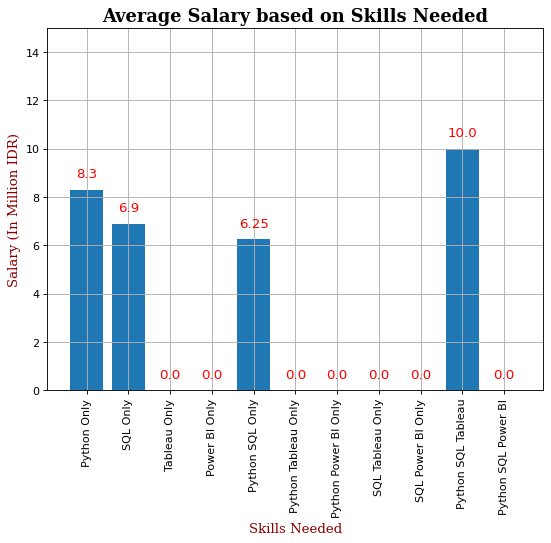

In [ ]:
# Plot the result

x = skl
y = avg_slry
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 12,
        }

font1 = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 16,
        }
plt.figure(figsize=(8, 6), dpi=80)
plt.bar(x,y)
plt.xticks(x, rotation='vertical')
plt.xlabel('Skills Needed', fontdict=font)
plt.ylim(0,max(y)+5)
plt.ylabel('Salary (In Million IDR)', fontdict=font)
plt.title('Average Salary based on Skills Needed', fontdict=font1)
plt.grid()
# put number in top of bar
for i, v in enumerate(y): # i is the iteration number, v is the content of y itself
    # plt.text(xticks = i, yticks = v+5(+5 will give a space between number and bar, the rest is font styling))
    plt.text(i , v + .5, str(v), color='red', fontweight='normal', fontdict={'size' : 12, 'family': 'sans-serif'}, horizontalalignment = 'center')
plt.show()

> 0 means that there is no data in that field

> Frankly to say, this data can't really picture how the salary being set if you have some certain skills because the lack of data (ex. for Python SQL Tableau there's only 1 data). But, i just want to show the process to get this graph

# Company Scale Related (combine with salary and benefit)

# Date Related